# MOTOR CURRENT PREDICTION

## PROBLEM STATEMENT



- Motor current is a continuous variable that can be used as a target for regression models. It can also be influenced by other variables in the dataset, such as oil temperature, pressure and electrical signals.
- Motor current can reflect the performance and efficiency of the compressor. By predicting the motor current, we can monitor the compressor's status and detect any anomalies or faults that may occur.
- Motor current can also help you optimize the energy consumption and cost of the compressor. By understanding how the motor current changes with different conditions and settings, we can adjust the compressor's operation to achieve the best results.

## 1. Setting up the data

In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: MetroPT3(AirCompressor).csv  


In [3]:
!head -2 MetroPT3\(AirCompressor\).csv

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.0120000000000004,9.358,9.34,-0.0240000000000009,9.358,53.60000000000001,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


## 2. EDA

In [4]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('MetroPT3(AirCompressor).csv')
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [6]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [7]:
df.shape

(1516948, 17)

In [8]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### 2.1 BOX Plot of Motor Current, Reserviors, TP3, Oil Temperature

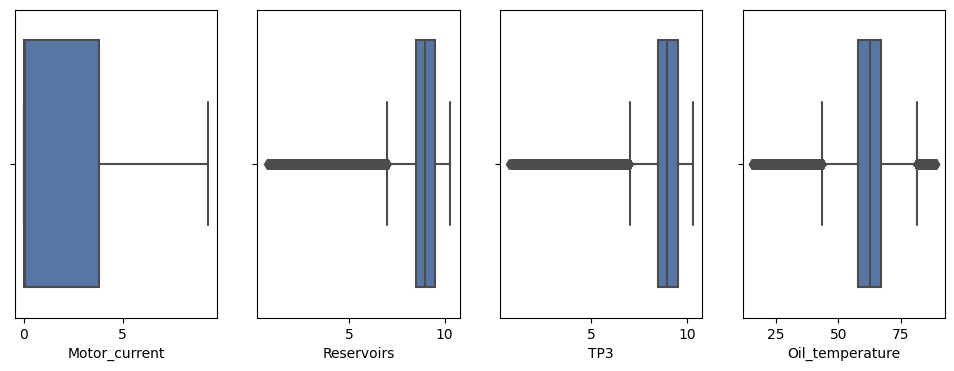

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Motor_current","Reservoirs","TP3","Oil_temperature"]):
    sns.boxplot(x=df[col], ax=ax[axid])

#### 2.1.1 Removing Outliers

In [10]:
Reservoirs_Q1 = df['Reservoirs'].quantile(0.25)
Reservoirs_Q3 = df['Reservoirs'].quantile(0.75)
Reservoirs_IQR = Reservoirs_Q3 - Reservoirs_Q1
upper_limit = Reservoirs_Q3 + 1.5 * Reservoirs_IQR
lower_limit = Reservoirs_Q1 - 1.5 * Reservoirs_IQR
df_filtered = df[(df['Reservoirs'] >= lower_limit) & (df['Reservoirs'] <= upper_limit)]
print(f'Number of row removed = {df.shape[0] - df_filtered.shape[0]}')
df=df_filtered

Number of row removed = 4526


#### 2.1.2 Why only removing outliers of Reserviors and not of TP3 and oil temperature?

As we can see from mean and standard deviation of reserviors, standard deviation is very much less which is 0.6 approx while for oil temperature is it is more. Also, it is given that value of reserviors will be around TP3. Thus, it is sufficient to remove only reserviors and not TP3 and oil temperature. Further, outliers of oil temparature may indicate at the startup or shutdown conditions of system which may be crucial part of our analysis. Hence, we are not removing its outlier.
Also, we can see from shape of dataframes that outlier account around only 4500 values which is only 3% of total data.

### 2.2 Scatter Plots

#### 2.2.1 Is there any correlation between motor current and TP2

<Axes: xlabel='Motor_current', ylabel='TP2'>

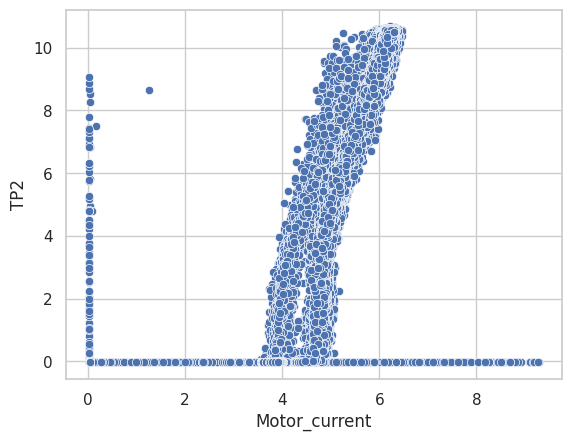

In [33]:
sns.scatterplot(x=df["Motor_current"], y=df["TP2"])

As we can see from scatterplot, we can infer that they have some correlation as motor current increases from 3 to 6, TP2 grows from 0 to 10 if we ignore other value ranges.

#### 2.2.2 Is there any correlation between motor current and H1

<Axes: xlabel='Motor_current', ylabel='H1'>

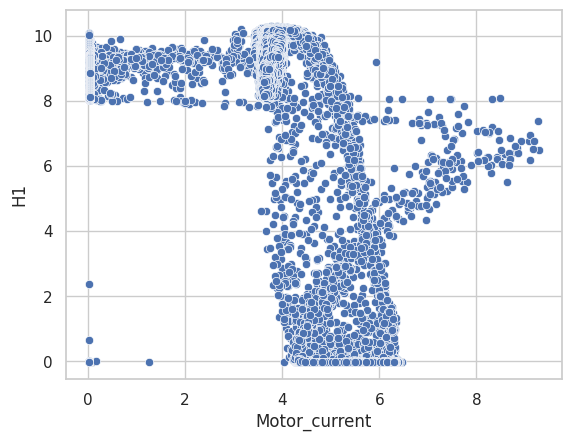

In [12]:
sns.scatterplot(x=df["Motor_current"], y=df["H1"])

If we focus on trend from motor current 3 to 6, we can say that it may be negatively correlated as motor current increases from 3 to 6, H1 decreases from 10 to 0.

#### 2.2.3 Is there any correlation between motor current and LPS

<Axes: xlabel='Motor_current', ylabel='LPS'>

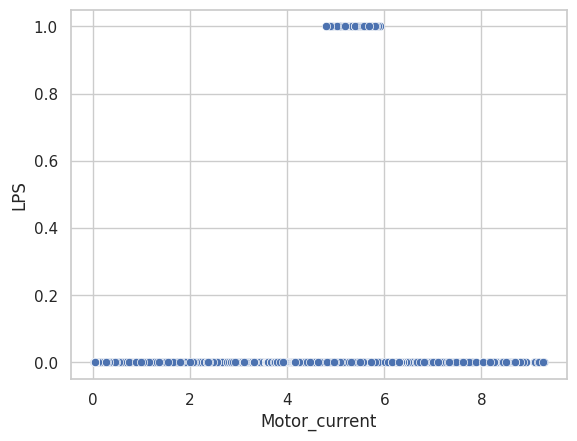

In [13]:
sns.scatterplot(x=df["Motor_current"], y=df["LPS"])

We can't say anything about correlation as we are unable to find any logical pattern in scatterplot for motor current and LPS.

### 2.3 Are NULL values present in dataset?

In [14]:
df.isnull().sum()

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

### 2.4 HeatMap of data

<Axes: >

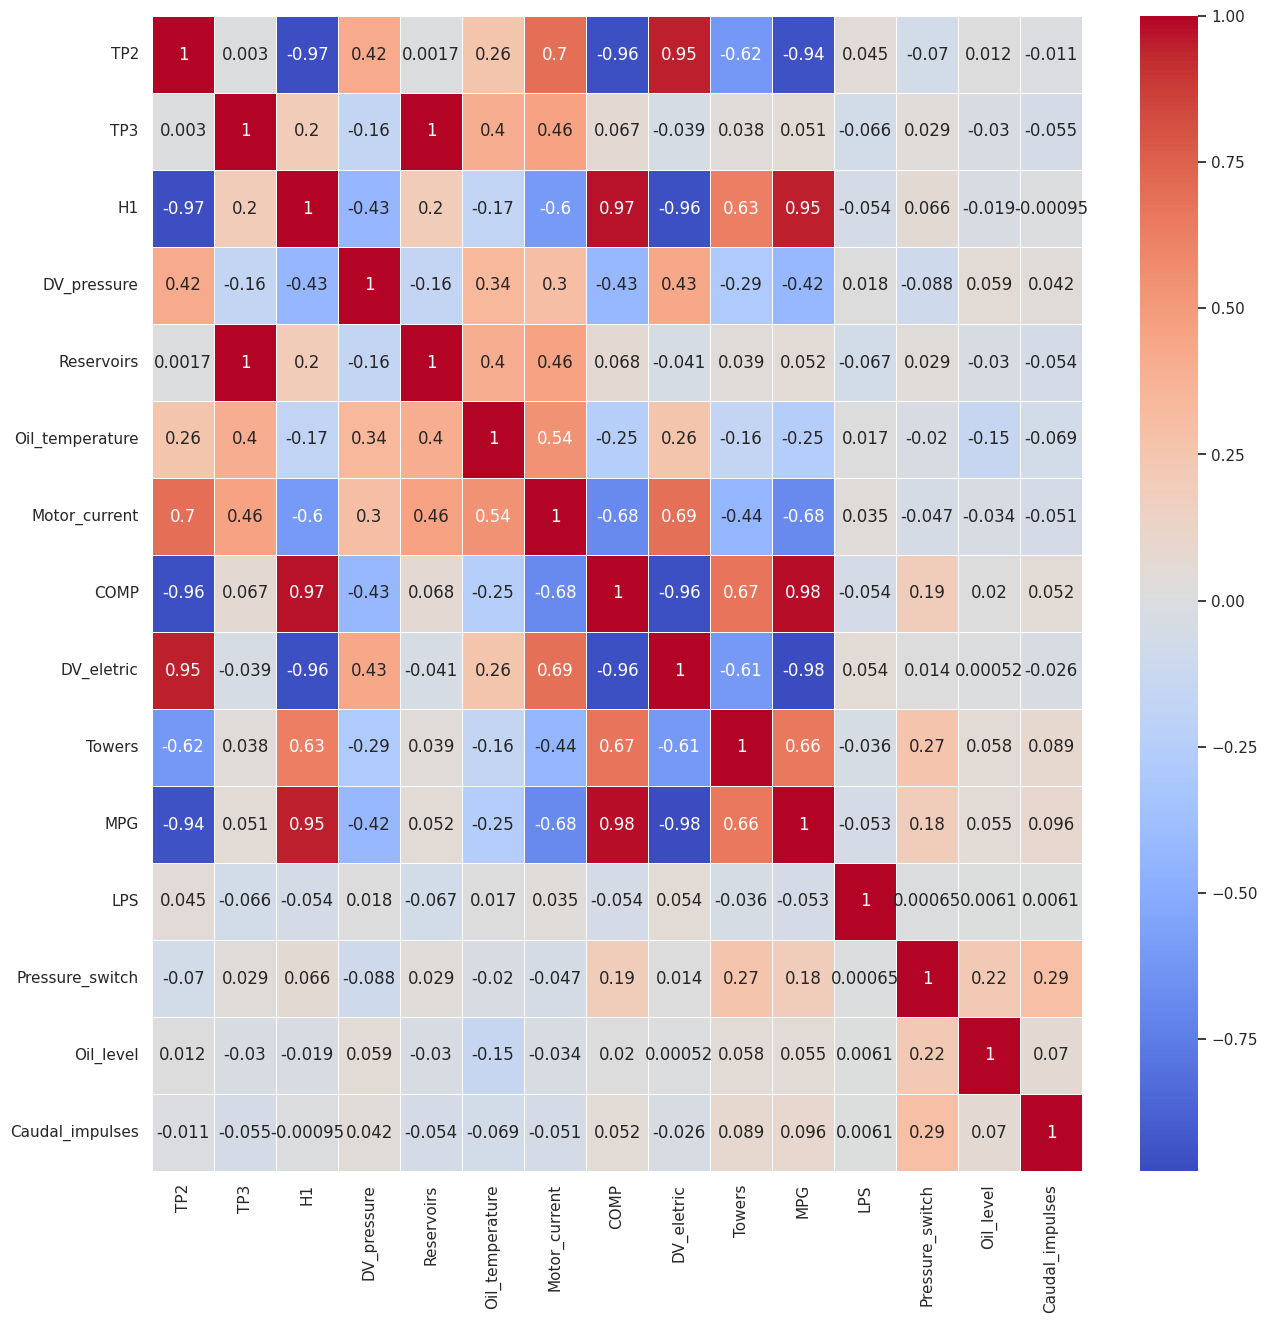

In [15]:
new_df = df[['TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses']]
plt.figure(figsize=(15, 15))
sns.heatmap(data=new_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

As we can see from heatmap, pressure switch, oil level and caudal impulse have correlation near to 0. Thus, we will not consider them for prediction as they of least importance.

## 3. Data Pre-Processing

In [16]:
from sklearn import preprocessing

In [17]:
data_df = df[['TP2', 'TP3', 'H1', 'Oil_temperature', 'Motor_current']]
data_df.head()

,TP2,TP3,H1,Oil_temperature,Motor_current
0,-0.012,9.358,9.340,53.600,0.0400
1,-0.014,9.348,9.332,53.675,0.0400
2,-0.012,9.338,9.322,53.600,0.0425
3,-0.012,9.328,9.312,53.425,0.0400
4,-0.012,9.318,9.302,53.475,0.0400


## 4. Data Transformation and Splitting

In [18]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data_df, df["Motor_current"], random_state=42, test_size=0.20)

In [20]:
X_train

,TP2,TP3,H1,Oil_temperature,Motor_current
1397578,-0.012,8.530,8.516,65.250,0.0425
672697,10.300,10.068,-0.012,63.575,5.9400
900849,8.066,8.042,-0.006,76.300,5.5750
1221506,-0.010,8.496,8.482,66.725,0.0375
706087,-0.016,8.536,8.526,54.825,0.0400
...,...,...,...,...,...
259226,-0.022,10.162,10.164,74.725,3.6925
1418883,-0.012,8.786,8.772,62.200,0.0450
131932,-0.014,8.958,8.942,57.075,0.0375
672203,-0.014,8.502,8.490,54.725,0.0425


In [21]:
y_train

1397578    0.0425
672697     5.9400
900849     5.5750
1221506    0.0375
706087     0.0400
            ...  
259226     3.6925
1418883    0.0450
131932     0.0375
672203     0.0425
121958     3.8350
Name: Motor_current, Length: 1209937, dtype: float64

In [22]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((1209937, 5), (302485, 5))

In [23]:
X_train_scaled

array([[-0.42242826, -0.78081759,  0.27952206,  0.39963121, -0.87100942],
       [ 2.7499062 ,  1.79345274, -2.29411145,  0.14003057,  1.69271402],
       [ 2.0626491 , -1.59762117, -2.29230073,  2.11222052,  1.53404356],
       ...,
       [-0.42304353, -0.06444067,  0.40808302, -0.8673749 , -0.87318299],
       [-0.42304353, -0.82768336,  0.27167562, -1.23159073, -0.87100942],
       [-0.4236588 ,  1.51225806,  0.69296928, -0.983614  ,  0.7776419 ]])

In [24]:
X_test_scaled

array([[-0.42119772, -0.17825756,  0.38816513,  0.10515884, -0.87209621],
       [ 2.16232292, -0.82098825, -2.29471502,  0.38413267,  1.53404356],
       [-0.42242826,  0.06946156,  0.43403664,  0.06253784, -0.87209621],
       ...,
       [-0.42488934,  1.75328207,  0.73944437,  0.27951748,  0.80372471],
       [ 2.73452444,  1.45200206, -2.2929043 ,  1.17068386,  1.81334704],
       [-0.42242826,  1.30805716,  0.65675493,  0.40738049,  0.7504723 ]])

## 5. Data Training and Evaluation

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [28]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'DecisionTreeRegressor': {"model": DecisionTreeRegressor(), "params": {'max_depth': list(range(1,10))}}
}


In [29]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 2.4765943508731423e-15 {}
RandomForestRegressor 0.002088662842034717 {'max_depth': 9, 'n_estimators': 15}
DecisionTreeRegressor 0.002546709071608482 {'max_depth': 9}
Best model:  DecisionTreeRegressor(max_depth=9)


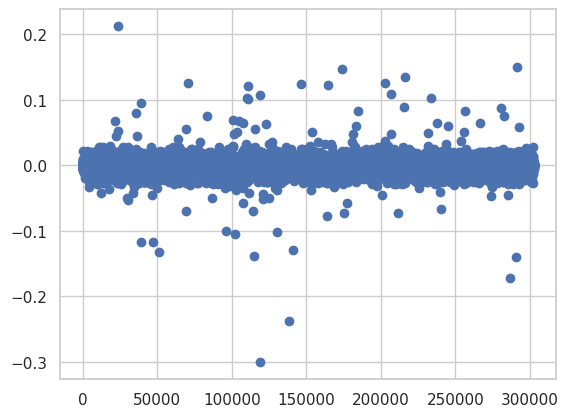

In [30]:
model_results = eval_models()

In [34]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.0,0.0,0.0,0.0,{}
RandomForestRegressor,0.002089,0.002298,0.000837,0.000843,"{'max_depth': 9, 'n_estimators': 15}"
DecisionTreeRegressor,0.002547,0.00268,0.001007,0.001014,{'max_depth': 9}


From table we can see that linear regression model performs best as compared to random forest and decision tree model. Linear regression model have root mean square error of 2.48e-15 which is nearly 0. Hence it is best model among all models.